### Imports

### Analysis of the data

In [ ]:
# used for debugging
!pip install -Uqq ipdb
import ipdb
from google.colab import userdata
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!git clone https://github.com/MahdiTheGreat/DependencyRatio.git
%cd DependencyRatio

Cloning into 'DependencyRatio'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 407.03 KiB | 6.07 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/DependencyRatio/DependencyRatio


In [ ]:
%pdb on

Automatic pdb calling has been turned ON


In [ ]:
import math
from IPython.display import display
def data_visualizer(df,max_columns=60,max_rows = 20,display_func=display):

  if not isinstance(df, pd.DataFrame):df=pd.DataFrame(df)
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)
  break_line="------------------------------------------------"
  print('data sample:')
  display_func(df)
  print(break_line)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', None)
  print('data info:')
  display_func(df.info())
  print(break_line)
  # Check the general structure of the dataset
  print('data description:')
  display_func(df.describe())
  print(break_line)
  print('data nan check:')
  display_func(df.isna().sum())
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)

In [ ]:
data= pd.read_csv("swedish_population_by_year_and_sex_1860-2022.csv")

In [ ]:
data_visualizer(data)

data sample:


,age,sex,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,men,60589,59797,62371,61515,61931,60998,63036,58645,50882,53024,54338,59158,58539,60461,60280,61254,61964,63885,61540,64745,61119,61969,61897,61830,64718,63933,65071,65731,...,59979,57173,53020,48505,46320,46011,45309,46764,47214,49275,51138,52037,52135,54684,55427,56528,57720,59496,57359,58309,58649,59584,59994,61005,59899,60032,59476,58485,58692,54095
1,0,women,58837,58136,60041,59384,60100,59622,60874,56586,49389,51571,52295,57235,56177,58422,58266,59489,59698,61639,59375,62588,59630,59325,59607,59386,62266,61604,63058,63400,...,57394,54811,50052,46478,43860,43223,43058,43950,44439,46751,48092,49053,49420,51594,52330,53136,54400,56414,54755,55178,55359,56296,55884,58018,56715,56807,55907,55104,55971,51091
2,1,men,56001,54544,52933,55776,57346,57776,57017,59071,54103,46338,49490,51284,55772,55017,56291,55944,57282,57960,59775,57936,59803,57264,57878,58140,58325,61063,60387,61397,...,63198,60098,57319,53175,48628,46514,46291,45641,47187,47631,49687,51460,52476,52730,55242,56162,57188,58366,60199,58059,59039,59489,60640,61352,62531,60973,60993,60058,59195,59411
3,1,women,54833,53762,52282,54500,55823,56641,56263,57539,52519,45394,48486,49718,54474,53053,54866,54662,56002,56323,58095,56340,58476,56326,55805,56562,56450,59209,58650,60156,...,59770,57472,54988,50196,46664,44201,43599,43589,44441,45055,47392,48821,49715,50183,52289,53001,53714,55057,57043,55393,55884,56083,57292,57216,59444,57789,57783,56533,55855,56712
4,2,men,52502,54062,51613,50710,53743,55227,55696,55254,56706,51225,43834,48220,49968,54358,53202,54449,54155,55232,55963,57906,55474,57563,55070,55911,56486,56535,59367,58492,...,64062,63472,60036,57348,53142,48735,46652,46503,45911,47449,47852,49910,51641,52925,53140,55789,56635,57606,58808,60713,58721,59807,60292,61817,62258,63361,61598,61348,60596,59723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,108,women,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,3,0,4,1,1,5,4,9,3,6,3,4,6,8,5,3,3,10,7,9,4,8
218,109,men,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0
219,109,women,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2,1,0,3,0,0,1,2,6,1,3,1,4,2,6,3,3,1,6,2,6,1
220,110+,men,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,3,0,0,0,0


------------------------------------------------
data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Columns: 165 entries, age to 2022
dtypes: int64(163), object(2)
memory usage: 286.3+ KB


None

------------------------------------------------
data description:


,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,17386.162162,17623.864865,17826.581081,18070.504505,18291.918919,18508.846847,18721.824324,18891.126126,18892.121622,18828.959459,18777.13964,18948.040541,19138.855856,19339.986486,19510.563063,19693.824324,19953.662162,20200.639640,20413.797297,20625.680180,20566.072072,20595.698198,20626.644144,20736.914414,20920.936937,21093.554054,21248.599099,21328.382883,21388.545045,21506.346847,21553.968468,21634.013514,21652.545045,21730.405405,21951.274775,22158.828829,22353.909910,22565.909910,22805.936937,22961.27027,23137.121622,23311.837838,23417.801802,23519.328829,23697.346847,23850.833333,24040.788288,24223.932432,24457.657658,24668.653153,24875.689189,25053.148649,25244.108108,25399.022523,25583.815315,25733.063063,25934.981982,26129.941441,26188.513514,26338.004505,26596.797297,26821.243243,26970.810811,27052.968468,27189.720721,27268.297297,27362.018018,27423.076577,27500.855856,27567.927928,27667.527027,27758.765766,27884.522523,27980.027027,28076.981982,28155.432432,28229.225225,28309.558559,28424.387387,28564.427928,28700.144144,28857.990991,29090.990991,29382.103604,29717.783784,30061.932432,30467.049550,30820.027027,31193.189189,31469.283784,31719.950450,31976.306306,32209.936937,32397.819820,32588.576577,32838.342342,33068.117117,33301.225225,33495.792793,33654.707207,33774.626126,33973.099099,34149.315315,34358.139640,34663.063063,35011.288288,35329.

------------------------------------------------
data nan check:


,0
age,0
sex,0
1860,0
1861,0
1862,0
1863,0
1864,0
1865,0
1866,0
1867,0


In [ ]:
# The data has been suplied in wide format, it is useful to unpivot the data
# 'age' & 'sex' kept as identifier variables
# 'year' unpivoted column
# 'people' name to the column containing the values from unpivoted columns
pivoted = pd.melt(data, id_vars=['age', 'sex'], var_name="year", value_name="people")
pivoted

,age,sex,year,people
0,0,men,1860,60589
1,0,women,1860,58837
2,1,men,1860,56001
3,1,women,1860,54833
4,2,men,1860,52502
...,...,...,...,...
36181,108,women,2022,8
36182,109,men,2022,0
36183,109,women,2022,1
36184,110+,men,2022,0


In [ ]:
# Apply the conversion function to the age column
pivoted['age'] = pivoted['age'].replace('110+', 110)
pivoted[['age','year']] = pivoted[['age','year']].apply(pd.to_numeric)
pivoted

,age,sex,year,people
0,0,men,1860,60589
1,0,women,1860,58837
2,1,men,1860,56001
3,1,women,1860,54833
4,2,men,1860,52502
...,...,...,...,...
36181,108,women,2022,8
36182,109,men,2022,0
36183,109,women,2022,1
36184,110,men,2022,0


**(i) Plot a figure that shows the dependencty ratio of Sweden from 1860 to 2022**

In [ ]:
def calculate_dependency_ratio(df):
    # Population under 15 years
    population_under_15 = df[df['age'] < 15].groupby('year')['people'].sum()

    # Population between 15 and 64 years (labor force)
    labor_force_population = df[(df['age'] >= 15) & (df['age'] <= 64)].groupby('year')['people'].sum()

    # Population over 64 years
    population_over_64 = df[df['age'] > 64].groupby('year')['people'].sum()

    dependency_ratio = (population_under_15 + population_over_64) / labor_force_population * 100

    return dependency_ratio

dependency_ratio = calculate_dependency_ratio(pivoted)

In [ ]:
dependency_ratio

,people
year,
1860,63.193680
1861,63.999417
1862,64.486441
1863,64.955034
1864,65.006540
...,...
2018,60.479909
2019,60.680639
2020,60.834247


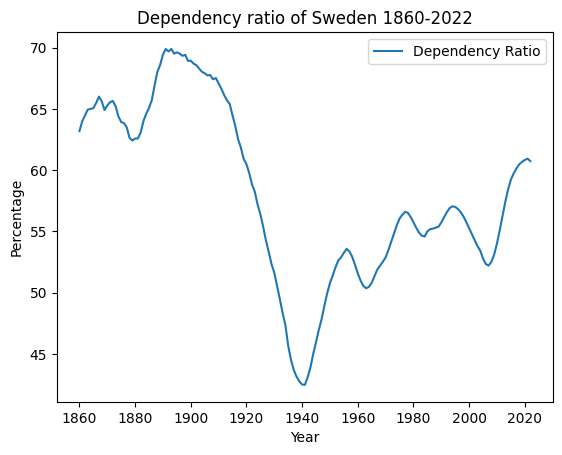

In [ ]:
# Plot the dependency ratio
dependency_ratio.rename('Dependency Ratio',inplace=True)
dependency_ratio.plot()
plt.title('Dependency ratio of Sweden 1860-2022')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show()

**(ii) Plot a figure that shows the fraction of the children, the elderly, and the total dependent population of the total Swedish population from 1860 to 2022**

In [ ]:
pivoted

,age,sex,year,people
0,0,men,1860,60589
1,0,women,1860,58837
2,1,men,1860,56001
3,1,women,1860,54833
4,2,men,1860,52502
...,...,...,...,...
36181,108,women,2022,8
36182,109,men,2022,0
36183,109,women,2022,1
36184,110,men,2022,0


In [ ]:
# Compute total population per year
total_population = pivoted.groupby('year')['people'].sum().reset_index()
total_population.columns = ['year', 'total']

# Compute population per age group
age_groups = {
    'children': pivoted[pivoted['age'] <= 14].groupby('year')['people'].sum().reset_index().rename(columns={'people': 'children'}),
    'elderly': pivoted[pivoted['age'] >= 65].groupby('year')['people'].sum().reset_index().rename(columns={'people': 'elderly'})
}

In [ ]:
display(total_population)
for key in age_groups:
    display(age_groups[key])

,year,total
0,1860,3859728
1,1861,3912498
2,1862,3957501
3,1863,4011652
4,1864,4060806
...,...,...
158,2018,10230185
159,2019,10327589
160,2020,10379295
161,2021,10452326


,year,children
0,1860,1292962
1,1861,1318714
2,1862,1338720
3,1863,1362024
4,1864,1380235
...,...,...
158,2018,1819729
159,2019,1834821
160,2020,1837798
161,2021,1839103


,year,elderly
0,1860,201645
1,1861,208106
2,1862,212807
3,1863,217661
4,1864,219574
...,...,...
158,2018,2035711
159,2019,2065367
160,2020,2088086
161,2021,2118766


In [ ]:
# Merge age groups data with total population
merged = total_population.copy()
for key in age_groups:
    # The suffixes are only used in the case of overlap
    merged = merged.merge(age_groups[key], on='year', how='left', suffixes=("", f'_people'))
    display(merged)
    merged[f'{key}_fraction'] = merged[key] / merged['total']

# Total dependent population fraction
merged['dependent_fraction'] = (merged['children_fraction'] + merged['elderly_fraction'])
merged.index = merged['year']
merged.drop(columns=['year'],inplace=True)
merged

,year,total,children
0,1860,3859728,1292962
1,1861,3912498,1318714
2,1862,3957501,1338720
3,1863,4011652,1362024
4,1864,4060806,1380235
...,...,...,...
158,2018,10230185,1819729
159,2019,10327589,1834821
160,2020,10379295,1837798
161,2021,10452326,1839103


,year,total,children,children_fraction,elderly
0,1860,3859728,1292962,0.334988,201645
1,1861,3912498,1318714,0.337052,208106
2,1862,3957501,1338720,0.338274,212807
3,1863,4011652,1362024,0.339517,217661
4,1864,4060806,1380235,0.339892,219574
...,...,...,...,...,...
158,2018,10230185,1819729,0.177878,2035711
159,2019,10327589,1834821,0.177662,2065367
160,2020,10379295,1837798,0.177064,2088086
161,2021,10452326,1839103,0.175952,2118766


,total,children,children_fraction,elderly,elderly_fraction,dependent_fraction
year,,,,,,
1860,3859728,1292962,0.334988,201645,0.052243,0.387231
1861,3912498,1318714,0.337052,208106,0.053190,0.390242
1862,3957501,1338720,0.338274,212807,0.053773,0.392047
1863,4011652,1362024,0.339517,217661,0.054257,0.393774
1864,4060806,1380235,0.339892,219574,0.054072,0.393963
...,...,...,...,...,...,...
2018,10230185,1819729,0.177878,2035711,0.198991,0.376869
2019,10327589,1834821,0.177662,2065367,0.199985,0.377647
2020,10379295,1837798,0.177064,2088086,0.201178,0.378242


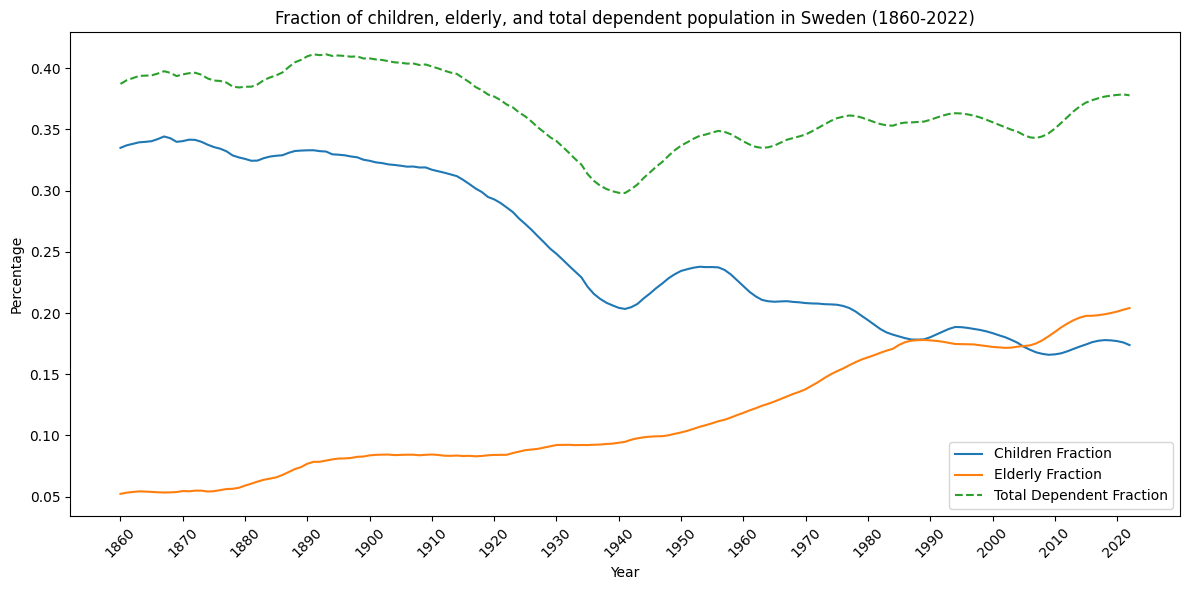

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))

# Calculate and plot fractions
for key in age_groups:
    plt.tick_params(axis='x', rotation=45)
    plt.xticks(np.arange(merged.index[0],merged.index[-1],10))
    plt.plot(merged.index, merged[f'{key}_fraction'], label=f'{key.capitalize()} Fraction')
plt.plot(merged.index, merged['dependent_fraction'], label='Total Dependent Fraction', linestyle='--')

# Customize the plot
plt.title('Fraction of children, elderly, and total dependent population in Sweden (1860-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.tight_layout()
plt.show()